Ed discussion:
- Join GitHub classroom
- Python learning resources

### Twitter data collection
- **Reference**: https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition

**Twitter**: platform for broadcasting messages. <br>
- [Justin Bieber](https://twitter.com/justinbieber) <br>
- [Steven Spielberg](https://twitter.com/sspielberg93?lang=en) <br>
- [UChicago](https://twitter.com/UChicago?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) <br>

### Twitter Jargon
- tweet: a message, max 280 characters <br>
- timeline: a list of tweets from a user <br>
- follower: if user A follows B, A will receive tweets from B's timeline <br>
- friend: if A follows B, then B is a friend of A.<br>
> **Asymmetry**: If A follows B, but B does not follow A, then A is not a friend of B.<br>

### Twitter API
- Provides programmatic access to public Twitter data
> direct messages not included <br>
> A user can set their timeline to be private, but this is rare <br>
- documentation: https://developer.twitter.com/en/docs/platform-overview

- Two sub-APIs:
> Search API: submit HTTP requests to access specific information (tweets, friends, ...) <br>
> Streaming API: open a continuous connection to Twitter to receive real-time data. <br>
> These APIs are simply HTTP GET requests:
https://api.twitter.com/1.1/search/tweets.json?q=chicago

### Authentication
- Twitter uses [OAuth](https://developer.twitter.com/en/docs/authentication/overview) to enable secure requests to the API.
- 1: creat an ordinary Twitter account to login
- 2: create an app and get tokens at: https://developer.twitter.com/en/apps
> These tokens will be sent with each API request <br>

<img src="tw_auth.jpg" width="800" />

![tw_auth2.jpg](tw_auth2.jpg)

### Tools and libraries
- To make data collection on Twitter more easy
- https://developer.twitter.com/en/docs/twitter-api/tools-and-libraries/v2

### Authorizing an application to access Twitter account data
- using a Python package [twitter](https://github.com/python-twitter-tools/twitter) to make API calls
> `pip install twitter`

- List of all endpoints:
> https://developer.twitter.com/en/docs/api-reference-index

In [ ]:
#mother's day

In [1]:
import twitter
import configparser

config = configparser.ConfigParser()
config.read('twitter.cfg')
my_auth = twitter.oauth.OAuth(
                    config.get('twitter', 'access_token'),
                    config.get('twitter', 'access_token_secret'),
                    config.get('twitter', 'consumer_key'),
                    config.get('twitter', 'consumer_secret'))

twitter_api = twitter.Twitter(auth=my_auth)

if(twitter_api):
    print('Established Twitter connection.')

Established Twitter connection.


In [2]:
# What can we do with this twitter object?
# built-in method `dir` tells us a list of attributes for the object
dir(twitter_api)

['TWITTER_UNAVAILABLE_WAIT',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_handle_response',
 '_handle_response_with_retry',
 'auth',
 'callable_cls',
 'domain',
 'format',
 'gzip',
 'retry',
 'secure',
 'timeout',
 'uri',
 'uriparts',
 'verify_context']

In [3]:
# built-in method `help` returns
# Python documentation of the object, method, attributes, etc.

help(twitter_api)

Help on Twitter in module twitter.api object:

class Twitter(TwitterCall)
 |  Twitter(format='json', domain='api.twitter.com', secure=True, auth=None, api_version=<class 'twitter.api._DEFAULT'>, retry=False, verify_context=True)
 |  
 |  The minimalist yet fully featured Twitter API class.
 |  
 |  Get RESTful data by accessing members of this class. The result
 |  is decoded python objects (lists and dicts).
 |  
 |  The Twitter API is documented at:
 |  
 |    https://dev.twitter.com/overview/documentation
 |  
 |  The list of most accessible functions is listed at:
 |  
 |    https://dev.twitter.com/rest/public
 |  
 |  
 |  Examples::
 |  
 |      from twitter import *
 |  
 |      t = Twitter(
 |          auth=OAuth(token, token_secret, consumer_key, consumer_secret))
 |  
 |      # Get your "home" timeline
 |      t.statuses.home_timeline()
 |  
 |      # Get a particular friend's timeline
 |      t.statuses.user_timeline(screen_name="billybob")
 |  
 |      # to pass in GET/POST

### Retrieving trends
- Returns the top 50 trending topics for a specific id, if trending information is available for it
- endpoint: 
> https://developer.twitter.com/en/docs/twitter-api/v1/trends/trends-for-location/api-reference/get-trends-place
- Where On Earch identifier (WOE): https://developer.twitter.com/en/docs/twitter-api/v1/trends/trends-for-location/api-reference/get-trends-place

In [4]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [5]:
print(world_trends)

[{'trends': [{'name': 'Bruce Willis', 'url': 'http://twitter.com/search?q=%22Bruce+Willis%22', 'promoted_content': None, 'query': '%22Bruce+Willis%22', 'tweet_volume': 102264}, {'name': '#AsItWas', 'url': 'http://twitter.com/search?q=%23AsItWas', 'promoted_content': None, 'query': '%23AsItWas', 'tweet_volume': 20456}, {'name': 'Tom Parker', 'url': 'http://twitter.com/search?q=%22Tom+Parker%22', 'promoted_content': None, 'query': '%22Tom+Parker%22', 'tweet_volume': 59115}, {'name': '#UltimaFermata', 'url': 'http://twitter.com/search?q=%23UltimaFermata', 'promoted_content': None, 'query': '%23UltimaFermata', 'tweet_volume': None}, {'name': 'Camp Nou', 'url': 'http://twitter.com/search?q=%22Camp+Nou%22', 'promoted_content': None, 'query': '%22Camp+Nou%22', 'tweet_volume': 74152}, {'name': '#MoonKnight', 'url': 'http://twitter.com/search?q=%23MoonKnight', 'promoted_content': None, 'query': '%23MoonKnight', 'tweet_volume': 140195}, {'name': '#chilhavisto', 'url': 'http://twitter.com/search?

In [6]:
type(world_trends[0])

dict

In [7]:
world_trends[0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [8]:
world_trends[0]['trends']

[{'name': 'Bruce Willis',
  'url': 'http://twitter.com/search?q=%22Bruce+Willis%22',
  'promoted_content': None,
  'query': '%22Bruce+Willis%22',
  'tweet_volume': 102264},
 {'name': '#AsItWas',
  'url': 'http://twitter.com/search?q=%23AsItWas',
  'promoted_content': None,
  'query': '%23AsItWas',
  'tweet_volume': 20456},
 {'name': 'Tom Parker',
  'url': 'http://twitter.com/search?q=%22Tom+Parker%22',
  'promoted_content': None,
  'query': '%22Tom+Parker%22',
  'tweet_volume': 59115},
 {'name': '#UltimaFermata',
  'url': 'http://twitter.com/search?q=%23UltimaFermata',
  'promoted_content': None,
  'query': '%23UltimaFermata',
  'tweet_volume': None},
 {'name': 'Camp Nou',
  'url': 'http://twitter.com/search?q=%22Camp+Nou%22',
  'promoted_content': None,
  'query': '%22Camp+Nou%22',
  'tweet_volume': 74152},
 {'name': '#MoonKnight',
  'url': 'http://twitter.com/search?q=%23MoonKnight',
  'promoted_content': None,
  'query': '%23MoonKnight',
  'tweet_volume': 140195},
 {'name': '#chilha

In [9]:
world_trends[0]['as_of']

'2022-03-30T21:02:49Z'

In [10]:
world_trends[0]['created_at']

'2022-03-28T13:40:42Z'

In [11]:
world_trends[0]['locations']

[{'name': 'Worldwide', 'woeid': 1}]

In [12]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

Bruce Willis
#AsItWas
Tom Parker
#UltimaFermata
Camp Nou
#MoonKnight
#chilhavisto
#PMSHappyBirthdayTone
The Wanted
Blac Chyna
Tyga
Die Hard
WHEN YOURE GONE TONIGHT
Moonlighting
Taha Akgül
Hunter Biden
Oscar Isaac
Géraldine
McCarthy
Avrupa Güreş Şampiyonası
Aphasia
a culpa é das estrelas
Booming
Cawthorn
iPhone 6
Alexia
Avrupa Şampiyonu
Hudson Hawk
失語症と診断
WE LOVE YOU JIMIN
Jabulani
第69回
ブルース・ウィリスさん
Casagrande
John McClane
12 Monkeys
引退発表
Susan Kihika
Feyzullah Aktürk
UERJ
Pulp Fiction
Lira
Covarde
Ivanka
Wordle 285 X
Exaggerated
#TopChef
#Πατρα
#VolevoFareLaRockstar2
#JKLive


In [13]:
print(us_trends)

[{'trends': [{'name': 'Bruce Willis', 'url': 'http://twitter.com/search?q=%22Bruce+Willis%22', 'promoted_content': None, 'query': '%22Bruce+Willis%22', 'tweet_volume': 102264}, {'name': '#PMSHappyBirthdayTone', 'url': 'http://twitter.com/search?q=%23PMSHappyBirthdayTone', 'promoted_content': None, 'query': '%23PMSHappyBirthdayTone', 'tweet_volume': None}, {'name': 'Blac Chyna', 'url': 'http://twitter.com/search?q=%22Blac+Chyna%22', 'promoted_content': None, 'query': '%22Blac+Chyna%22', 'tweet_volume': 10916}, {'name': 'Tyga', 'url': 'http://twitter.com/search?q=Tyga', 'promoted_content': None, 'query': 'Tyga', 'tweet_volume': 11749}, {'name': '#AsItWas', 'url': 'http://twitter.com/search?q=%23AsItWas', 'promoted_content': None, 'query': '%23AsItWas', 'tweet_volume': 20456}, {'name': 'Disney', 'url': 'http://twitter.com/search?q=Disney', 'promoted_content': None, 'query': 'Disney', 'tweet_volume': 332187}, {'name': '#NationalDoctorsDay', 'url': 'http://twitter.com/search?q=%23NationalDo

In [14]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

Bruce Willis
#PMSHappyBirthdayTone
Blac Chyna
Tyga
#AsItWas
Disney
#NationalDoctorsDay
Die Hard
Moonlighting
McCarthy
#GiftOfSox
Booming
#InsteadOfSlapping
Moon Knight
Hunter Biden
Aphasia
Cawthorn
Tom Parker
Exaggerated
The Wanted
Title 42
Ivanka
Hudson Hawk
Eric Church
12 Monkeys
Rob Kardashian
The Fifth Element
Crabtree
Jonathan Majors
The Sixth Sense
Death Becomes Her
Clarity
Spy Kids
Wears Valley
Nats
Camp Nou
Jerome Bettis
Colbert
Marko Stunt
The Last Boy Scout
Oscar Isaac
Pulp Fiction
Doug Ducey
Creed III
John McClane
Porsha
Blake Wesley
Unbreakable
Calvin Johnson
Moonrise Kingdom


In [15]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Blac Chyna', '#AsItWas', 'McCarthy', 'Ivanka', 'Exaggerated', 'John McClane', 'Camp Nou', 'The Wanted', 'Hunter Biden', 'Aphasia', 'Tyga', '12 Monkeys', 'Booming', 'Die Hard', 'Tom Parker', 'Bruce Willis', 'Pulp Fiction', '#PMSHappyBirthdayTone', 'Hudson Hawk', 'Moonlighting', 'Oscar Isaac', 'Cawthorn'}


In [16]:
# Python tip: list comprehensions
for i in [1,2,3]:
    print(i)

1
2
3


In [17]:
[i for i in [1,2,3]]

[1, 2, 3]

In [18]:
print([i*2 + 3 for i in [1,2,3]])

[5, 7, 9]


### Get user timeline
- tweets for a specific user 
- endpoint:
> https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline

In [19]:
u_timeline = twitter_api.statuses.user_timeline(screen_name='UChicago')

In [27]:
u_timeline[0]

{'created_at': 'Wed Mar 30 20:28:26 +0000 2022',
 'id': 1509266322345107458,
 'id_str': '1509266322345107458',
 'text': "Prof. Philip V. Bohlman is the driving force behind UChicago's upcoming Korngold Festival—a 10-day celebration of i… https://t.co/wDUfUZiptT",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/wDUfUZiptT',
    'expanded_url': 'https://twitter.com/i/web/status/1509266322345107458',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="https://prod1.sprinklr.com" rel="nofollow">Sprinklr Publishing</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 131144285,
  'id_str': '131144285',
  'name': 'The University of Chicago',
  'screen_name': 'UChicago',
  'location': 'Chicago, Illinois',
  'description': "The official Tw

In [20]:
u_timeline[0]['text']

"Prof. Philip V. Bohlman is the driving force behind UChicago's upcoming Korngold Festival—a 10-day celebration of i… https://t.co/wDUfUZiptT"

In [21]:
u_timeline[1]['text']

'https://t.co/vsNMOPV6KC'

### Get followers
- Results are given in groups of 20 users and multiple "pages" of results can be navigated through using the next_cursor value in subsequent requests.
- endpoint:
> https://developer.twitter.com/en/docs/twitter-api/v1/accounts-and-users/follow-search-get-users/api-reference/get-followers-list

In [22]:
uc_followers = twitter_api.followers.list(screen_name='UChicago', count=200)

In [23]:
uc_followers.keys()

dict_keys(['users', 'next_cursor', 'next_cursor_str', 'previous_cursor', 'previous_cursor_str', 'total_count'])

In [24]:
for u in uc_followers['users']:
    print(u['name'])

Songrun He
Lily Blackman 2025 GK
Isabelle Daw
Claudia Alvarado she/her
Kugonza🇺🇬🇷🇼
Nayan Mukherjee 🇮🇳
Karen Zhou
Andri Ferguson
David Ansari (he/him)
sahın
Chethan
Sobhit Bishi
Yin WANG
JAICHAND (Sonu Singh O+) 🇮🇳
Ovunc Oral
Adeep
Venkata Ramana
Gideon Anagli
martyra peng
Vicente A. Garcia M.
W. Ben Hur
想公主
Dave Yount
Irreverent Seminarian
G_Moses
Henry Pinner
Mariam
Simon A
Gemm
Kevin Fontana Fantinatti
Carlos 0504
Adrian Puga
Liz theresa
Mark Tupy
120 legit120
WT Lam
K N 🌻🇺🇦🇺🇲🇹🇼
something
Paula Algarra
Elf Lab @ UChicago
سعَد العتيبي-Saad Alotaibi
messi
Black Revolutionary Collective
Patryk
Smart Contracts Chicago
Agueda Solís
rich
Ryoma Shimazumi
Noor Suwwan
tom cantrell
HM93
Donna
Christopher Rios
王凯源
Anna Kantarjian
Hauke Group
Dũng Nguyễn Tiến
Anthony
Solansvera
Xenocs
Tarek Hamada
Adarsh Kumar
Ayako O. Henry
Ángel Darío Orué A.
Reza Sch
don't block account.
Pankaj Budhiraja
Katherina_K
Rebeca
Monica Choi
dulin
NDBulldogFootball
fengsd
Karen Pekow
Juan Martin Camacho
Marty. Quick

### Limitations
- Rate limits! https://developer.twitter.com/en/docs/rate-limits
> e.g., 450 search requests in 15 minute window <br>
- Can only search 2 weeks in past
> But can get up to 3,200 most recent tweets of a user <br>
- Response code: 
> https://developer.twitter.com/en/support/twitter-api/error-troubleshooting

In [14]:
tweets = twitter_api.search.tweets(q='UChicago')

In [25]:
tweets['search_metadata']#.keys()#statuses.status_code

{'completed_in': 0.071,
 'max_id': 1509229893858598922,
 'max_id_str': '1509229893858598922',
 'next_results': '?max_id=1509222178696351750&q=UChicago&include_entities=1',
 'query': 'UChicago',
 'refresh_url': '?since_id=1509229893858598922&q=UChicago&include_entities=1',
 'count': 15,
 'since_id': 0,
 'since_id_str': '0'}

In [ ]:
# Dealing with rate limits.
# search tweets endpoint: https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets
def robust_request(twitter_api, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter_api.search.tweets(q)
        if request:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' 
                  % request.text)
            time.sleep(61 * 15)

### Collect tweet data
- endpoint:
> https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent

In [94]:
import json
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

Search tweets endpoint:
> https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

In [26]:
# Set the query variable to a trending topic or anything else for that matter. 

q = 'UChicago' 
count = 100

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

In [27]:
type(statuses)

list

In [28]:
len(statuses)

100

In [102]:
statuses[0]

{'created_at': 'Wed Mar 30 03:14:04 +0000 2022',
 'id': 1509006016058376192,
 'id_str': '1509006016058376192',
 'text': 'RT @cazadorpy: @HugoPortilloPY @HarrisPolicy @UChicago Será que esta Universidad esta enterada que este C.Fernández V. siendo pte del BCP r…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'cazadorpy',
    'name': 'El Cazador',
    'id': 1257066867602198528,
    'id_str': '1257066867602198528',
    'indices': [3, 13]},
   {'screen_name': 'HugoPortilloPY',
    'name': 'Hugo Portillo',
    'id': 4902959409,
    'id_str': '4902959409',
    'indices': [15, 30]},
   {'screen_name': 'HarrisPolicy',
    'name': 'Harris Policy',
    'id': 248941406,
    'id_str': '248941406',
    'indices': [31, 44]},
   {'screen_name': 'UChicago',
    'name': 'The University of Chicago',
    'id': 131144285,
    'id_str': '131144285',
    'indices': [45, 54]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'r

In [103]:
type(statuses[0])

dict

In [104]:
statuses[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [106]:
statuses[0]['text']

'RT @cazadorpy: @HugoPortilloPY @HarrisPolicy @UChicago Será que esta Universidad esta enterada que este C.Fernández V. siendo pte del BCP r…'

In [108]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('#Favorites: ', statuses[i]['favorite_count'])
    print('#Retweets: ', statuses[i]['retweet_count'])


RT @cazadorpy: @HugoPortilloPY @HarrisPolicy @UChicago Será que esta Universidad esta enterada que este C.Fernández V. siendo pte del BCP r…
#Favorites:  0
#Retweets:  2

#CFP #socialsciences #humanities: last date 31st Mar 2022
https://t.co/hsp1INXBk8
@_KSU @everythinstudnt… https://t.co/mUiffWGM3Q
#Favorites:  0
#Retweets:  0

RT @ArtsPrison: The “Truth and Beauty in the Hard Places” exhibition opens 1/27. This exhibition was put together by many community members…
#Favorites:  0
#Retweets:  1

Thanks to @HarrisPolicy and @UChicago_WiPP for featuring me during #WomensHistoryMonth Leading Follies was a highli… https://t.co/uuv92PzAc9
#Favorites:  3
#Retweets:  0

RT @ArtsPrison: This Friday at 6-8 PM join PNAP community members Alice Kim, Trayce Matthews, Tara Betts, and Renaldo Hudson for a closing…
#Favorites:  0
#Retweets:  1

RT @bryankaus: Love @UChicago economist @Econ_4_Everyone’s new book, The Voltage Effect - a fresh look at the drivers that enable ideas, pr…
#Favorites:  0


### Extracting attributes from tweets
- E.g., text, screen names, and hashtags

In [115]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [w 
         for t in status_texts 
            for w in t.split()]


In [119]:
status_texts[:3]

['RT @cazadorpy: @HugoPortilloPY @HarrisPolicy @UChicago Será que esta Universidad esta enterada que este C.Fernández V. siendo pte del BCP r…',
 '#CFP #socialsciences #humanities: last date 31st Mar 2022\nhttps://t.co/hsp1INXBk8\n@_KSU @everythinstudnt… https://t.co/mUiffWGM3Q',
 'RT @ArtsPrison: The “Truth and Beauty in the Hard Places” exhibition opens 1/27. This exhibition was put together by many community members…']

In [121]:
# print in json format
print(json.dumps(status_texts[0:5], indent=1))

[
 "RT @cazadorpy: @HugoPortilloPY @HarrisPolicy @UChicago Ser\u00e1 que esta Universidad esta enterada que este C.Fern\u00e1ndez V. siendo pte del BCP r\u2026",
 "#CFP #socialsciences #humanities: last date 31st Mar 2022\nhttps://t.co/hsp1INXBk8\n@_KSU @everythinstudnt\u2026 https://t.co/mUiffWGM3Q",
 "RT @ArtsPrison: The \u201cTruth and Beauty in the Hard Places\u201d exhibition opens 1/27. This exhibition was put together by many community members\u2026",
 "Thanks to @HarrisPolicy and @UChicago_WiPP for featuring me during #WomensHistoryMonth Leading Follies was a highli\u2026 https://t.co/uuv92PzAc9",
 "RT @ArtsPrison: This Friday at 6-8 PM join PNAP community members Alice Kim, Trayce Matthews, Tara Betts, and Renaldo Hudson for a closing\u2026"
]


In [125]:
# Explore the first 5 items for each list
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "cazadorpy",
 "HugoPortilloPY",
 "HarrisPolicy",
 "UChicago",
 "_KSU"
]
[
 "CFP",
 "socialsciences",
 "humanities",
 "WomensHistoryMonth",
 "WFNS2022"
]
[
 "RT",
 "@cazadorpy:",
 "@HugoPortilloPY",
 "@HarrisPolicy",
 "@UChicago"
]


### Finding the most popular retweets

In [136]:
# list comprehension
retweets = [
            # Store out a tuple of these attributes' values...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            # ... so long as the 'retweeted_status' is a key in status.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item 
sorted(retweets, reverse=True)[:5]

[(688,
  'jason__haider',
  1501400253248933890,
  'RT @jason__haider: Attracting unsuspecting insects with its uncanny, flower-like appearance, the deceptive, nearly indistinguishable floral…'),
 (76,
  'anita_simha',
  1508476019153457152,
  "RT @anita_simha: It's not quite at Oscars-slap level of excitement, but my very first first-author publication is live and open-access on t…"),
 (76,
  'anita_simha',
  1508476019153457152,
  "RT @anita_simha: It's not quite at Oscars-slap level of excitement, but my very first first-author publication is live and open-access on t…"),
 (76,
  'anita_simha',
  1508476019153457152,
  "RT @anita_simha: It's not quite at Oscars-slap level of excitement, but my very first first-author publication is live and open-access on t…"),
 (76,
  'anita_simha',
  1508476019153457152,
  "RT @anita_simha: It's not quite at Oscars-slap level of excitement, but my very first first-author publication is live and open-access on t…")]

#### Histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

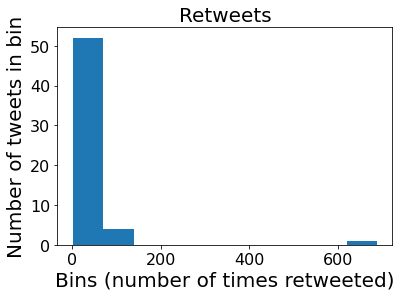

In [171]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

#### Look up users who have retweeted a status

In [165]:
# statuses[0]['id']

In [153]:
# statuses[0]['retweet_count']#['retweet_count']

2

In [160]:
# statuses[0]['retweeted_status']['user']['screen_name']

'cazadorpy'

In [162]:
# Use the original tweet id to get its retweeted_status node 

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'ShinobiSasha', 'livingmybestie', 'Rockawaytheday']


### Count frequency of ...
- words in tweets
- screen_names
- hashtags

In [167]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('the', 71), ('RT', 57), ('of', 44), ('to', 42), ('in', 39), ('and', 25), ('a', 24), ('at', 20), ('for', 17), ('@UChicago', 16)]

[('UChicago', 18), ('keepark', 7), ('grosseaumd', 7), ('UChicagoMed', 6), ('RoxannaMGarcia', 6), ('ProfMSinha', 6), ('thenation', 6), ('SteveStuWill', 6), ('anita_simha', 4), ('katherinelsm', 3)]

[('WFNS2022', 6), ('Chicago', 5), ('Healthcare', 2), ('CFP', 1), ('socialsciences', 1), ('humanities', 1), ('WomensHistoryMonth', 1), ('Mariupol', 1), ('ICC', 1), ('chinesehistory', 1)]



Pretty visualization

In [168]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| the       |    71 |
| RT        |    57 |
| of        |    44 |
| to        |    42 |
| in        |    39 |
| and       |    25 |
| a         |    24 |
| at        |    20 |
| for       |    17 |
| @UChicago |    16 |
+-----------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| UChicago       |    18 |
| keepark        |     7 |
| grosseaumd     |     7 |
| UChicagoMed    |     6 |
| RoxannaMGarcia |     6 |
| ProfMSinha     |     6 |
| thenation      |     6 |
| SteveStuWill   |     6 |
| anita_simha    |     4 |
| katherinelsm   |     3 |
+----------------+-------+
+--------------------+-------+
| Hashtag            | Count |
+--------------------+-------+
| WFNS2022           |     6 |
| Chicago            |     5 |
| Healthcare         |     2 |
| CFP                |     1 |
| socialsciences     |     1 |
| humanities         |     1 |
| WomensHistoryMonth |     1 |
| Ma

#### Histogram plots of words, screen names, and hashtags frequencies

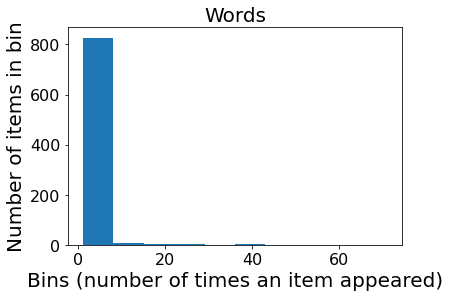

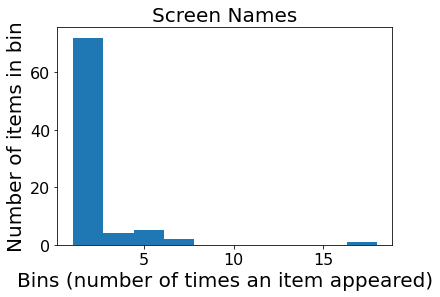

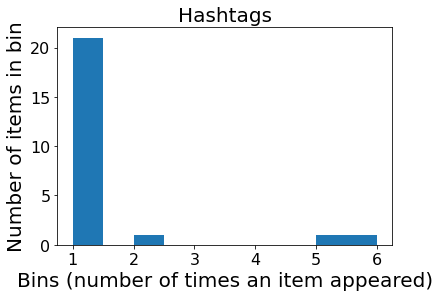

<Figure size 432x288 with 0 Axes>

In [170]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

### Word frequency analysis

In [202]:
# word_counts

Text(0.5, 0, 'Word Rank (how many times a word appears)')

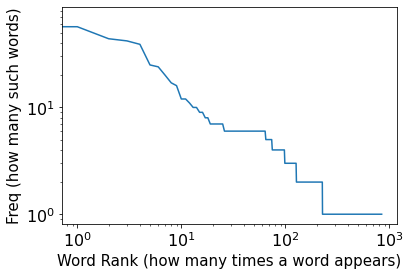

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts) # log-log plot
plt.ylabel("Freq (how many such words)", fontsize=15)
plt.xlabel("Word Rank (how many times a word appears)", fontsize=15)

**Zipf's Law** (proposed by George Kingsley Zipf, an American Linguist): 
- models the frequency distribution of words in languages
- there are a large number of rare words
- there are a small number of frequent words
- Alternatively: the frequency of a word is inversely proportional to its rank

Let $f_i$ be the frequency of the word at rank $i$:

$$ f_i \propto \frac{1}{i} $$
equivalently

$ f_i = k$ $i^b $ for constant $k$ and $b=-1$
<br><br><br>

### Lexical diversity
$$ \frac{number\_of\_unique\_words}{total\_word\_counts} $$
- A measurement of how many different lexical words are in a text.
- An important indicator of how complex and difficult to read a text is.
- Low lexical diversity: few unique words, high repetition, easy to read.
- High lexical diversity: lots of unique words, low repetition, hard to read.

In [169]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.47581552305961755
0.5384615384615384
0.7058823529411765
17.78


In [32]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                              {'screen_name': screen_name,
                                               'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))


got 199 tweets for user ChiCritMass


In [33]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

Ok #bikechi #chicago let her know https://t.co/O5bm4gKk3z
@E2TheBam @FartSandwich Agree 😂
RT @expatua: If Europe stops Russian gas, Europe loses 5% of its economy but Russia loses 40% of its economy.
@FartSandwich @E2TheBam Agree
What! Chicago is like. hold my beer &amp; ride this. Both airports. @cta #chicago #publictransport… https://t.co/LAaJz8QQ4c
Enrico Fermi got my vote https://t.co/GgSiIxRZLV
RT @greenergroundpt: Fresh cut grass smells just like juiced wheatgrass. I find the scent to be empowering, mildly spicy, and pleasant. Doe…
Less bicyclists &amp; more cars. Yeah that will workout great 😂😂 (read the sign in store window) https://t.co/1tOh6CJSWt
Great idea 👍🏻 #chicago https://t.co/bd2geisQU0
RT @EricAllixRogers: #bancars
Car driving wanker 😂 https://t.co/ek5Gy09p8l
RT @krislucius: I'm de-accessioning a bunch of books and all of the architecture-related titles went very quickly at work, save for this on…
RT @slucy: Imagine this on Michigan Avenue: wide sidewalks, 15-foot bike

In [34]:
# Python tip: Counter objects.
from collections import Counter
# This is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [35]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1338 unique terms in 199 tweets


[('the', 79),
 ('rt', 62),
 ('a', 49),
 ('to', 43),
 ('#bikechi', 38),
 ('for', 28),
 ('#chicago', 27),
 ('of', 27),
 ('in', 25),
 ('is', 22)]

In [36]:
# Python tip: sorting using lambda functions
sorted([5, 4, -10, -1], key=lambda x: -x)

[5, 4, -1, -10]

In [37]:
sorted([('joe', 10), ('mary', 20), ('jim', 15), ('joe', 5)],
         key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [38]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

# print top 50
print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts[:50]))

the=79
rt=62
a=49
to=43
#bikechi=38
for=28
#chicago=27
of=27
in=25
is=22
&amp;=20
i=20
you=20
that=19
chicago=18
on=16
so=16
🙌=16
it=16
and=15
we=15
are=15
this=14
be=13
great=12
not=12
but=11
was=11
my=10
bike=10
it’s=10
😍=10
will=9
has=9
luv=9
if=8
woohoo=8
🎉=8
our=8
your=8
ride=7
all=7
at=7
really=7
@cta=6
just=6
yeah=6
some=6
from=6
can=6


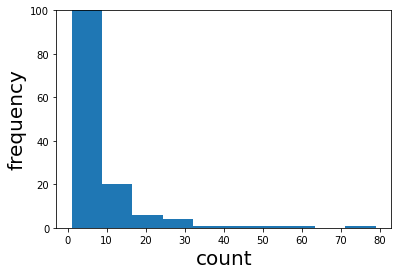

In [42]:
# Plot these counts using matplotlib
plt.figure(figsize=(6,4))
plt.hist(list(counts.values()), bins=10) # rwidth=0.9
plt.xlabel('count', size=20)
plt.ylabel('frequency', size=20)
plt.ylim((0,100))
plt.show()

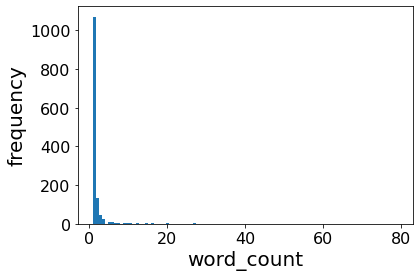

In [45]:
# resizing things in matplotlib
# Plot these counts using matplotlib
plt.rc('font', size=20)                  # controls default text sizes
plt.rc('axes', titlesize=20)             # fontsize of the axes title
plt.rc('axes', labelsize=20)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)            # fontsize of the tick labels
plt.rc('ytick', labelsize=16)            # fontsize of the tick labels
plt.figure(figsize=(6,4))
plt.hist(list(counts.values()), bins=100)
plt.xlabel('word_count')
plt.ylabel('frequency')
#plt.ylim((0,100))
plt.show()

Text(0, 0.5, 'word count')

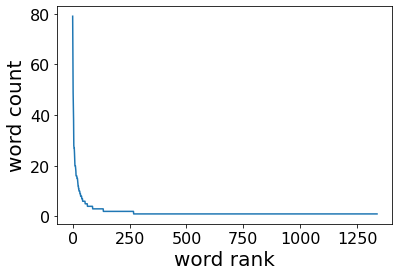

In [49]:
plt.plot(sorted(counts.values(), reverse=True))
plt.xlabel('word rank')
plt.ylabel('word count')

**Zipf's Law**: there are many rare words; there are a small number of extremely frequent words.

Alternatively:
The frequency of a term is inversely proportional to its rank.

Let $f_i$ be the frequency of the $i$th most common term

$$ f_i \propto \frac{1}{i} $$
equivalently

$ f_i = k$ $i^b $ for constant $k$ and $b=-1$

In [50]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[79, 62, 49, 43, 38, 28, 27, 27, 25, 22]

In [51]:
ranks = list(range(1, len(freqs)+1))
ranks[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [52]:
# Minimize mean squared error to find best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

In [53]:
# Define the Zipf function and fit the k parameter.
def zipfs(i, k):
    return k / i
zipf_parms, covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is f_i = %.2f*i^-1' % zipf_parms[0])

Zipf fit is f_i = 115.12*i^-1


Text(0, 0.5, 'log(frequency)')

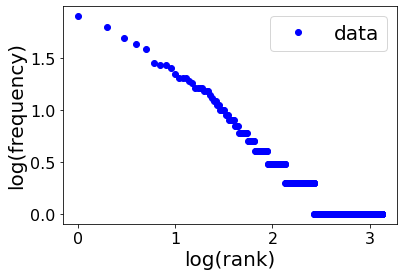

In [54]:
# Try a log-log plot.
# NumPy library will be used a lot for math.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.figure()
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

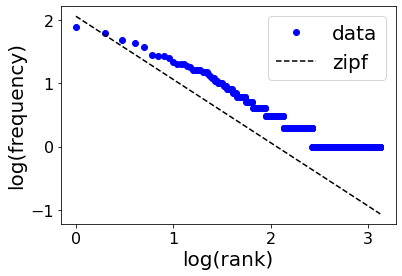

In [55]:
plt.figure()
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')

Zipf's law holds with varying degrees of accuracy depending on the dataset.

Here, due in part to the small dataset, there are many more words that occur only once than expected by Zipf.

### Summary: twitter data collection
- Python package [twitter](https://github.com/python-twitter-tools/twitter)
- authorize an app to access Twitter data
- list of endpoints
> retrieving trends <br>
> get user timeline <br>
> get followers <br>
> search tweet data <br>
> find the most popular retweets <br>
> ...<br>
- Zipf's law